In [1]:
#Import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data exploring
data = pd.read_csv("breast-cancer.csv")


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Data cleaning

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.drop('Unnamed: 32', axis=1, inplace=True, errors='ignore')

In [9]:
data.drop('id', axis = 1, inplace = True)

EDA

In [10]:
def violinplotVisualisation(start_index,end_index):
    df =data.drop('diagnosis',axis=1) #standardise the data diff b/w avg
    df_std = (df - df.mean())/df.std() #subtract mean and divide std
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #make subgroup of 10 features axis=1 (cols)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x='features',y='value',hue='diagnosis',data=df, split=True,      inner='quart')
    plt.xticks(rotation=45)

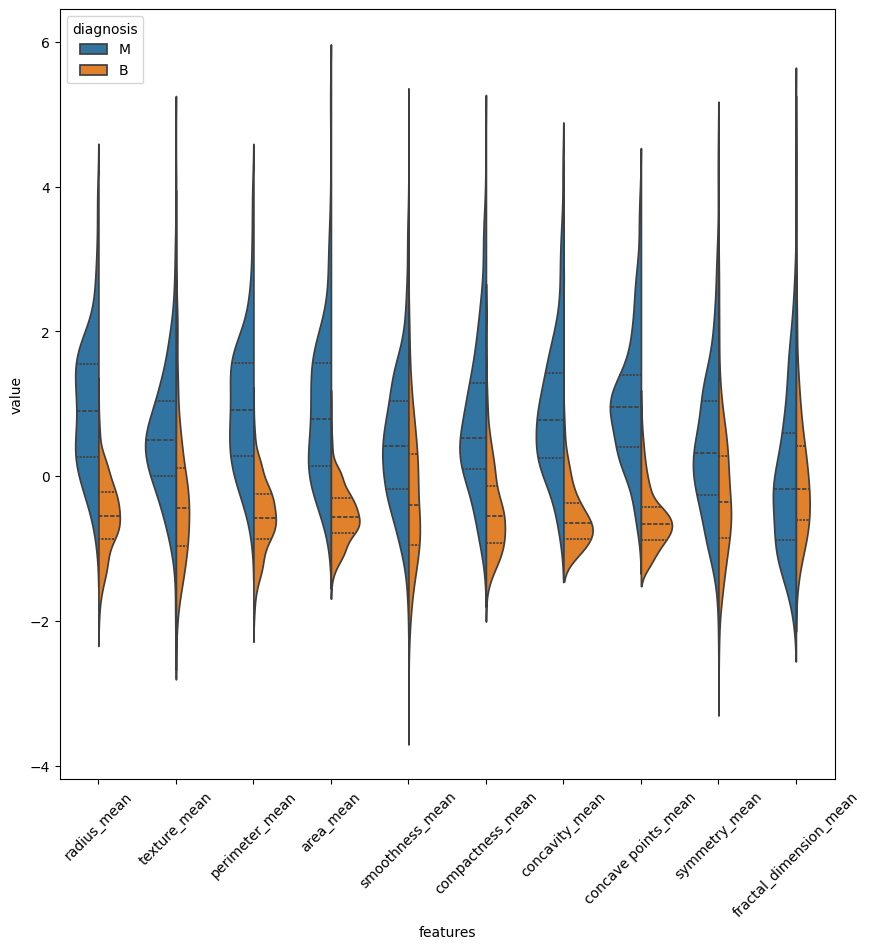

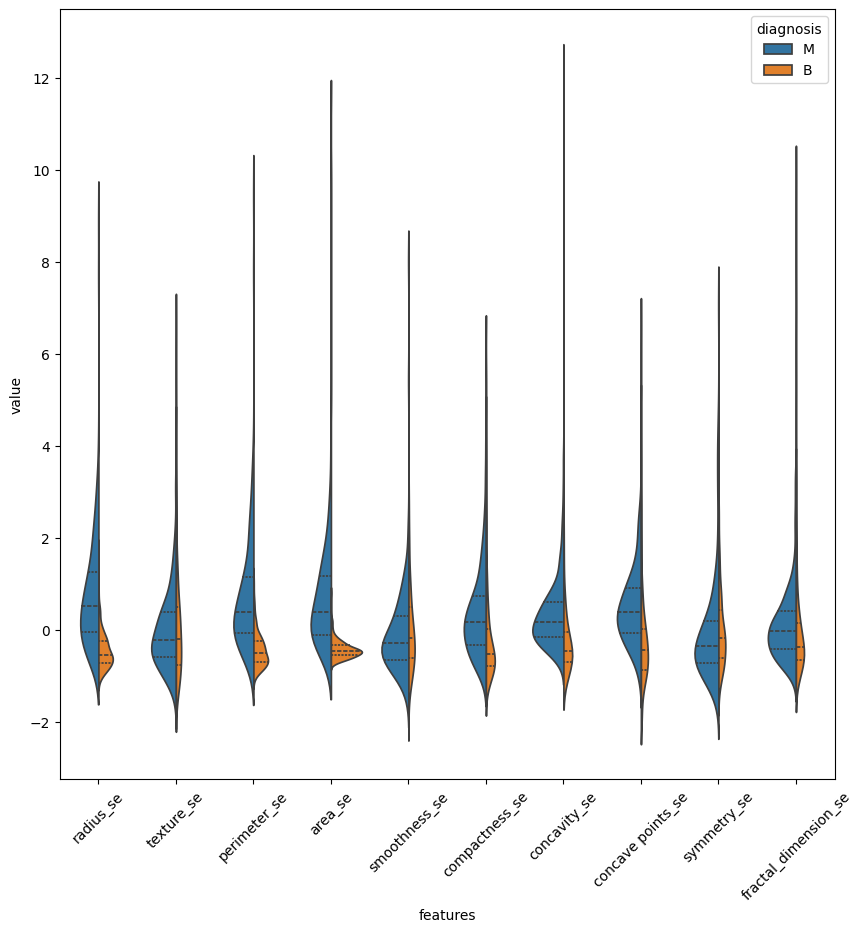

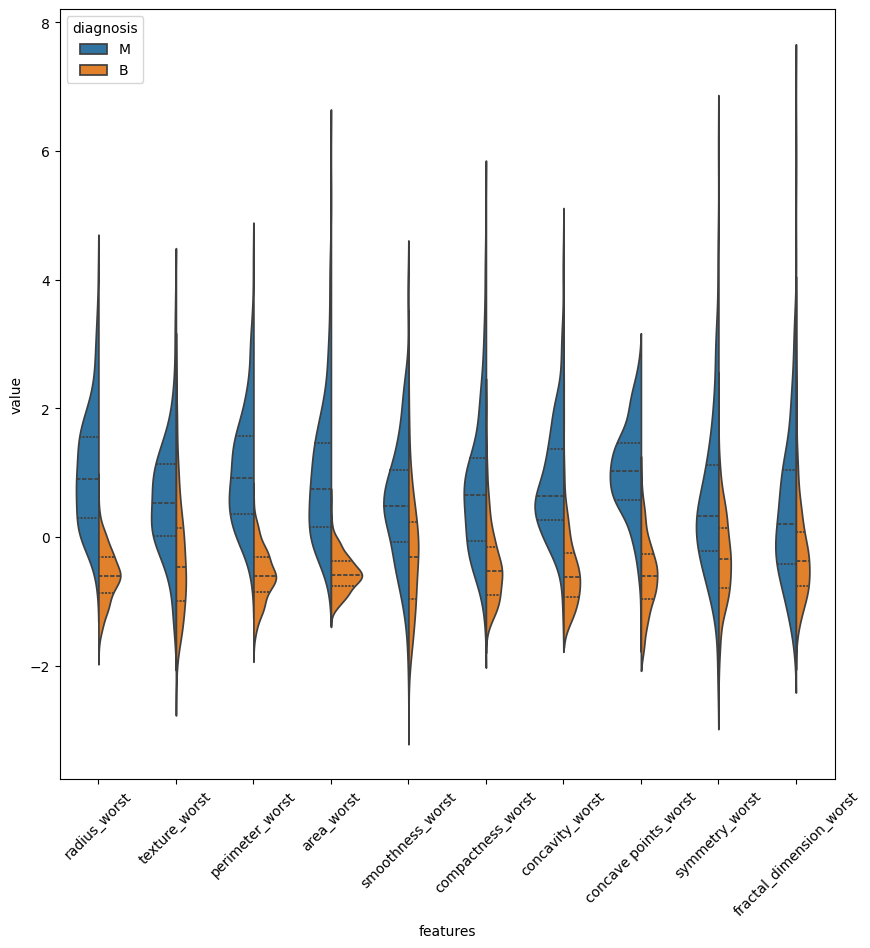

In [11]:
violinplotVisualisation(0,10)
violinplotVisualisation(10,20)
violinplotVisualisation(20,30)

In [12]:
def swarmplotVisualisation(start_index, end_index):
    sns.set(style='whitegrid', palette='muted')
    df =data.drop('diagnosis',axis=1) #standardise the data diff b/w avg
    df_std = (df - df.mean())/df.std() #subtract mean and divide std
    df = pd.concat([data.diagnosis, df_std.iloc[:, start_index:end_index]],axis=1) #make subgroup of 10 features axis=1 (cols)
    df= pd.melt(df, id_vars = 'diagnosis',
             var_name='features',
             value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='features',y='value',hue='diagnosis',data=df)
    plt.xticks(rotation=45)

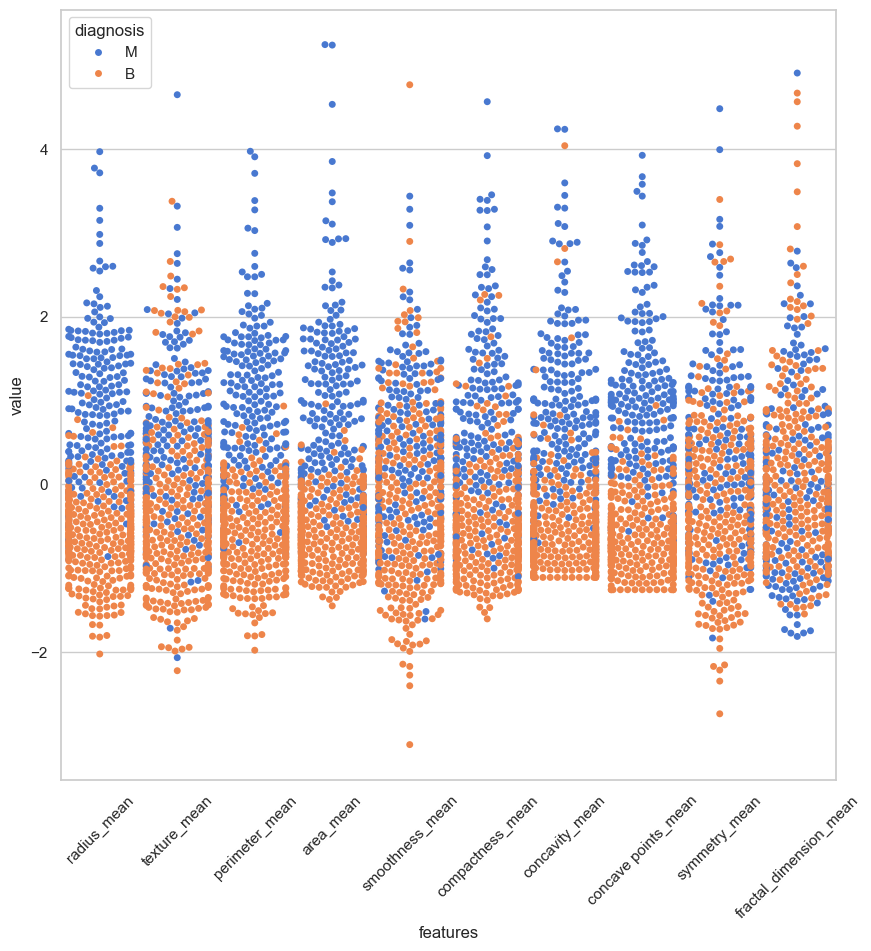

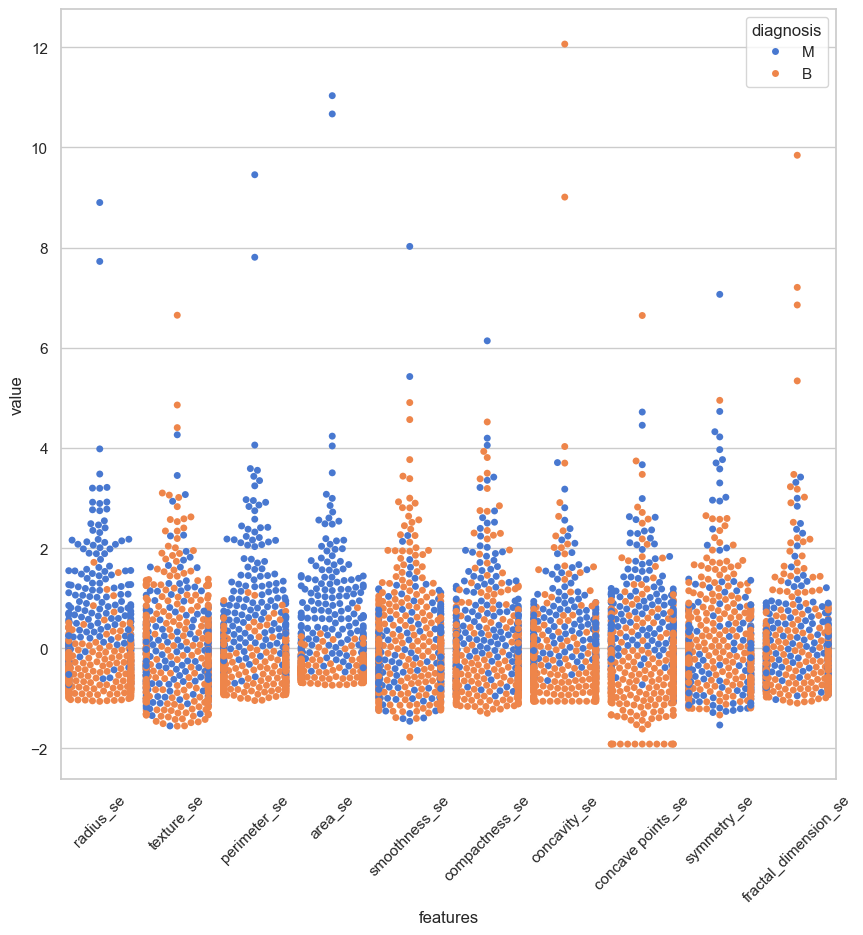

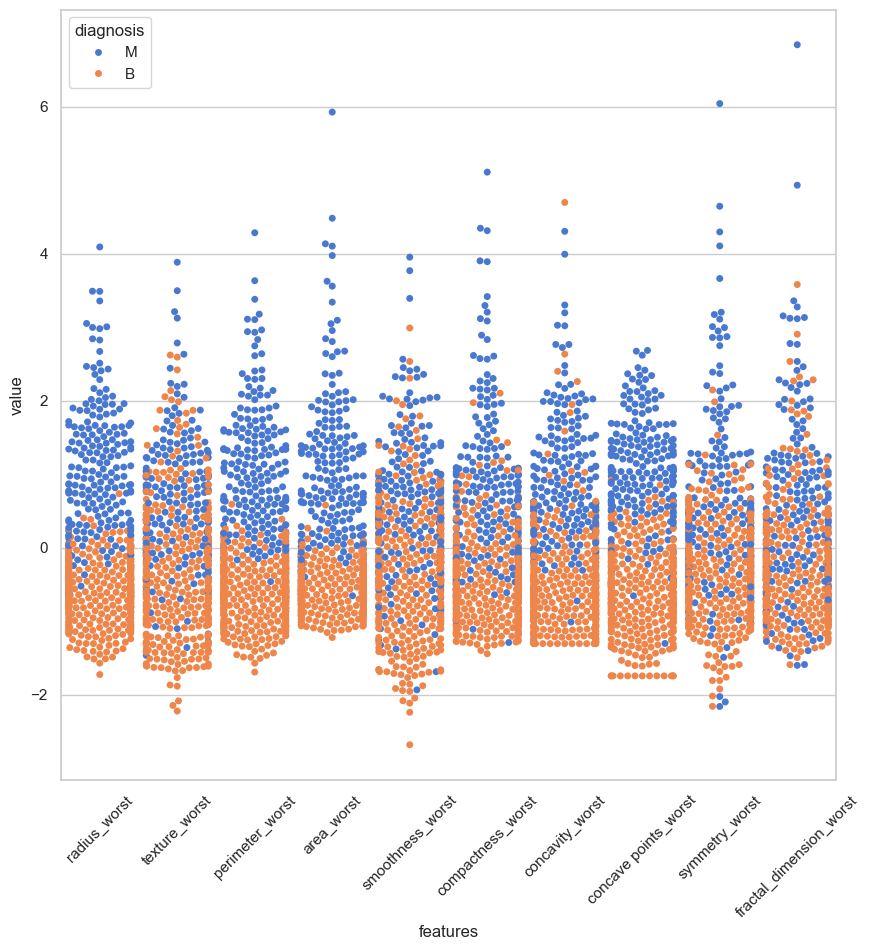

In [13]:
swarmplotVisualisation(0,10)
swarmplotVisualisation(10,20)
swarmplotVisualisation(20,30)

Data Preprocessing
Feature selection with correlation

Text(0.5, 1.05, 'Correlation of df Features')

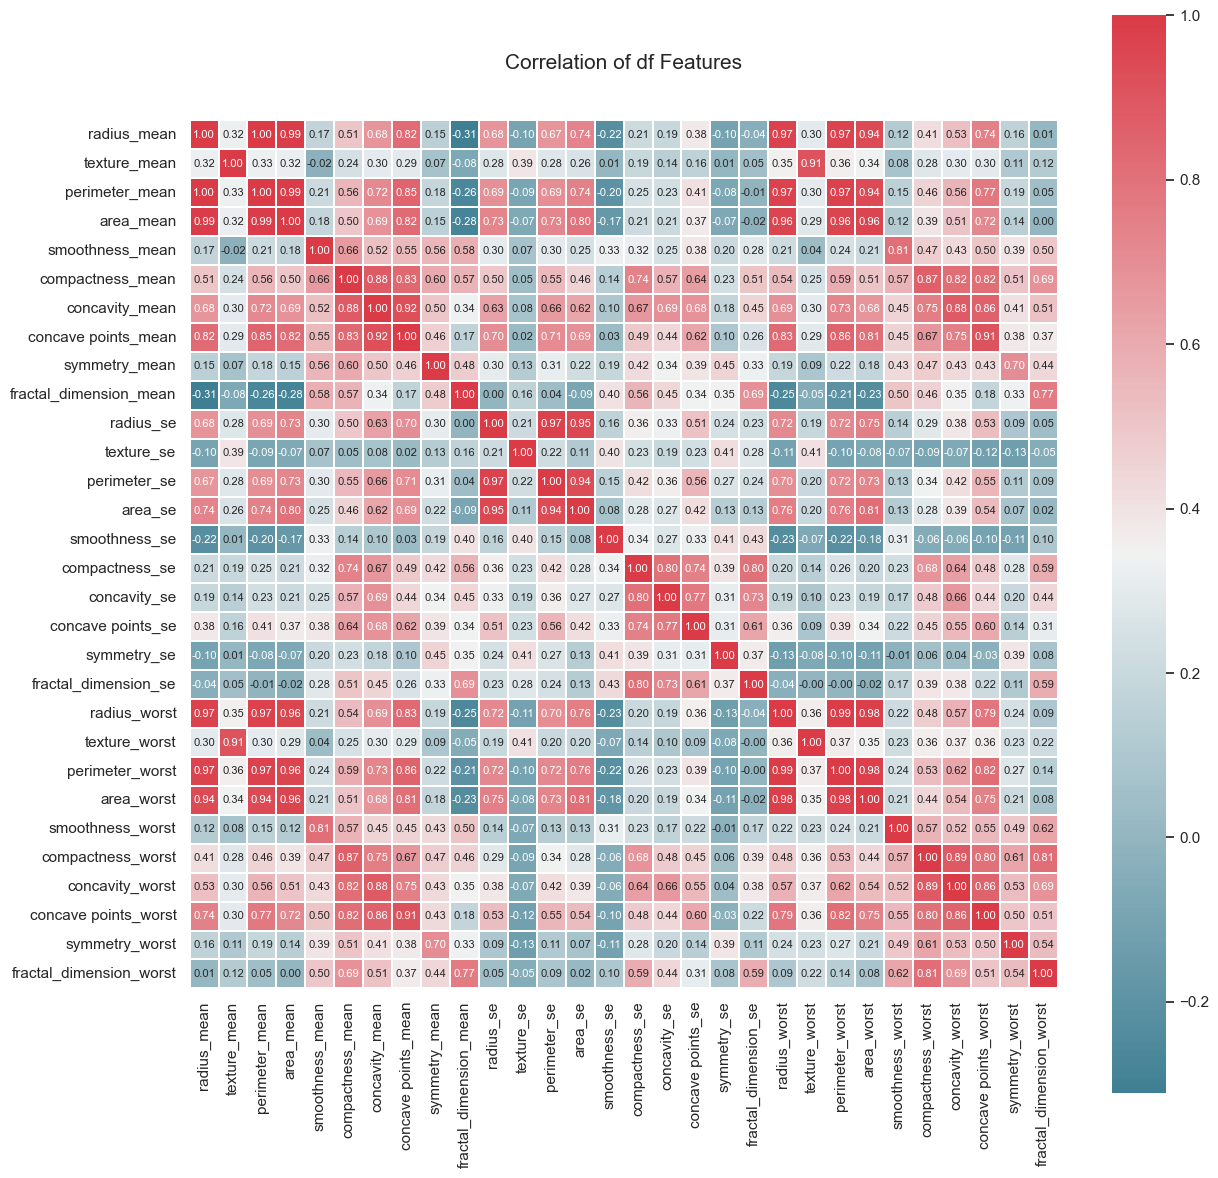

In [15]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

In [19]:
data.drop(
    ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 
     'radius_worst', 'perimeter_worst', 'area_worst'],
    axis=1, inplace=True, errors='ignore'
)
print(data.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [20]:
data.shape

(569, 24)

Data imbalancing and encoding

In [21]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

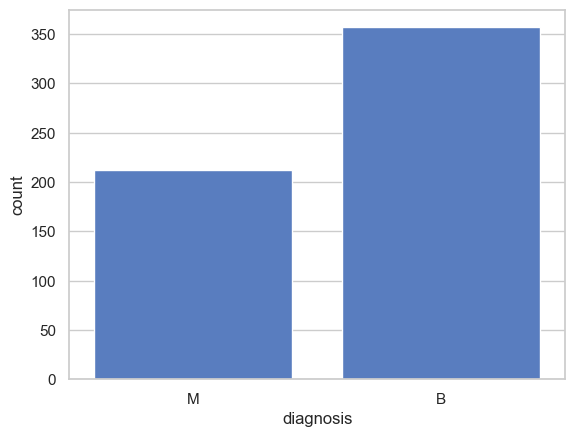

In [22]:
sns.countplot(x = 'diagnosis', data = data)

In [23]:
data['diagnosis'].replace(['M', 'B'], [1, 0], inplace = True)

In [24]:
data.diagnosis.value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

Train test split


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop('diagnosis',axis=1).values
y = data['diagnosis'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101) 

Data scalling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
X_train_scale = sc.fit_transform(X_train)

In [33]:
X_test_scaled=sc.transform(X_test)

Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

In [35]:
data.shape

(569, 24)

In [36]:
model = Sequential()

In [37]:
model.add(Dense(23))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid')) 

In [38]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x=X_train_scale, y=y_train, validation_data=(X_test_scaled, y_test),batch_size=250 , epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.3610 - loss: 0.6952 - val_accuracy: 0.3846 - val_loss: 0.6677
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4095 - loss: 0.6806 - val_accuracy: 0.5245 - val_loss: 0.6512
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5866 - loss: 0.6645 - val_accuracy: 0.6573 - val_loss: 0.6361
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7073 - loss: 0.6535 - val_accuracy: 0.6993 - val_loss: 0.6223
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7501 - loss: 0.6456 - val_accuracy: 0.7133 - val_loss: 0.6092
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7803 - loss: 0.6302 - val_accuracy: 0.7622 - val_loss: 0.5968
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8108 - loss: 0.6195 - val_accuracy: 0.8042 - val_loss: 0.5849
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8429 - loss: 0.6048 - val_accuracy: 0.8392 - val_loss

In [40]:
Loss=pd.DataFrame(model.history.history)

<Axes: >

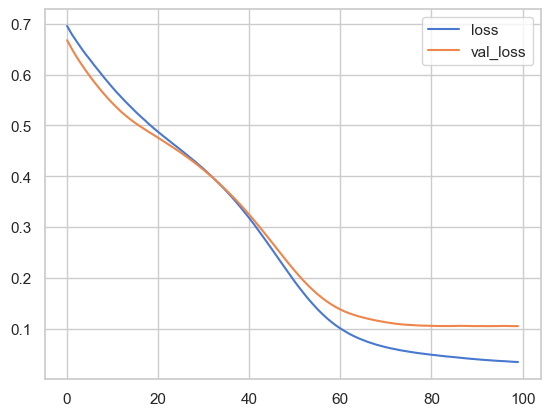

In [41]:
Loss[['loss','val_loss']].plot()

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,277 (16.71 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,852 (11.14 KB)

Evaluation

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
prediction = model.predict(X_test_scaled)
prediction

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[4.9915523e-03],
       [6.2369253e-03],
       [2.6875432e-03],
       [9.8348558e-01],
       [2.7129348e-04],
       [5.1682960e-04],
       [2.0350290e-03],
       [1.0000000e+00],
       [6.1809104e-03],
       [4.8587197e-03],
       [9.9999976e-01],
       [2.9262924e-03],
       [1.0756926e-01],
       [5.7149562e-04],
       [9.9999171e-01],
       [2.3019963e-03],
       [4.7521340e-03],
       [6.2490865e-03],
       [9.9999964e-01],
       [9.5026088e-01],
       [3.0387599e-02],
       [9.0872648e-04],
       [1.3442721e-02],
       [1.7651794e-03],
       [9.9998969e-01],
       [2.0678174e-02],
       [9.9988341e-01],
       [4.3952499e-05],
       [9.9999970e-01],
       [9.9999654e-01],
       [8.4135735e-01],
       [9.9999726e-01],
       [1.6936196e-01],
       [9.8792392e-01],
       [7.1786228e-05],
       [2.4310556e-04],
       [9.9725890e-01],
       [9.7410846e-01],
       [9.9999189e-01],
       [9.9999917e-01],
       [9.9938256e-01],
       [5.191158

In [45]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [46]:
print(confusion_matrix(y_test,prediction.round()))

[[86  2]
 [ 2 53]]


<Axes: >

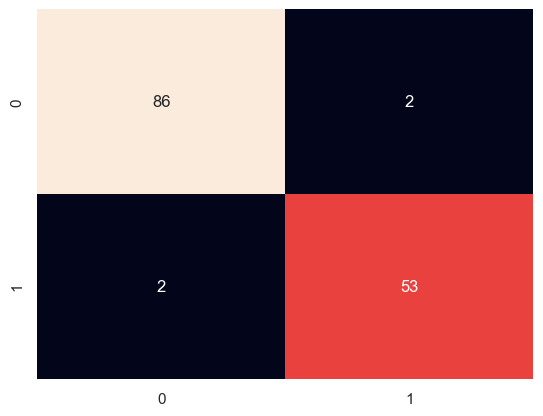

In [47]:
matrix= confusion_matrix(y_test , prediction.round())
sns.heatmap(matrix,cbar=False, annot=True)